In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
data_url = "https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv"

In [5]:
df = pd.read_csv(data_url)
df.head()

Survived  Pclass                                               Name  \
0         0       3                             Mr. Owen Harris Braund   
1         1       1  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
2         1       3                              Miss. Laina Heikkinen   
3         1       1        Mrs. Jacques Heath (Lily May Peel) Futrelle   
4         0       3                            Mr. William Henry Allen   

      Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare  
0    male  22.0                        1                        0   7.2500  
1  female  38.0                        1                        0  71.2833  
2  female  26.0                        0                        0   7.9250  
3  female  35.0                        1                        0  53.1000  
4    male  35.0                        0                        0   8.0500

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [7]:
df.describe()

Survived      Pclass         Age  Siblings/Spouses Aboard  \
count  887.000000  887.000000  887.000000               887.000000   
mean     0.385569    2.305524   29.471443                 0.525366   
std      0.487004    0.836662   14.121908                 1.104669   
min      0.000000    1.000000    0.420000                 0.000000   
25%      0.000000    2.000000   20.250000                 0.000000   
50%      0.000000    3.000000   28.000000                 0.000000   
75%      1.000000    3.000000   38.000000                 1.000000   
max      1.000000    3.000000   80.000000                 8.000000   

       Parents/Children Aboard       Fare  
count               887.000000  887.00000  
mean                  0.383315   32.30542  
std                   0.807466   49.78204  
min                   0.000000    0.00000  
25%                   0.000000    7.92500  
50%                   0.000000   14.45420  
75%                   0.000000   31.13750  
max                   6.000000  512.32920

In [8]:
df.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

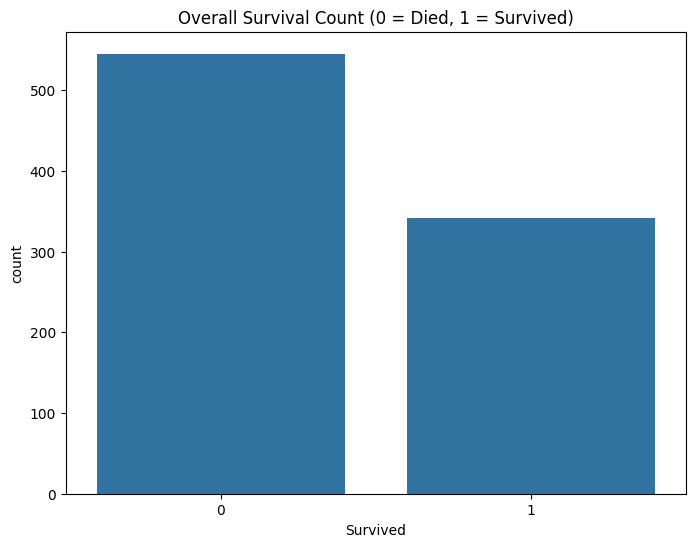

In [11]:
plt.figure(figsize=(8,6))
sns.countplot(x = 'Survived', data = df)
plt.title('Overall Survival Count (0 = Died, 1 = Survived)')
plt.show()


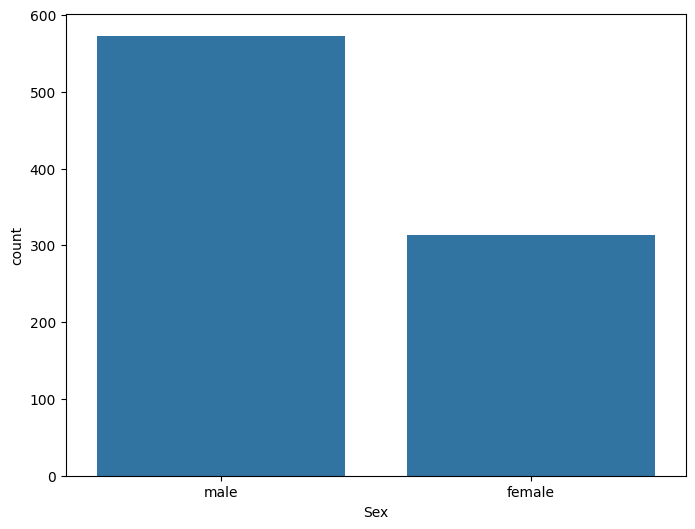

In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', data = df)
plt.show()

<Axes: xlabel='Pclass', ylabel='count'>

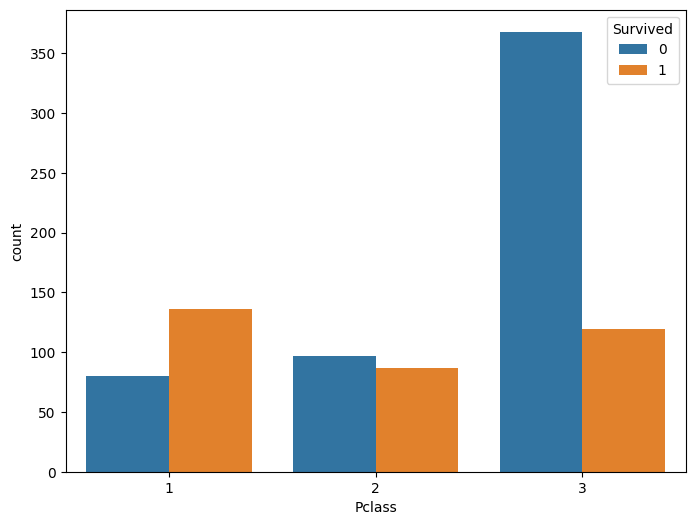

In [13]:
plt.figure(figsize=(8,6))
sns.countplot(x='Pclass', hue='Survived', data = df)

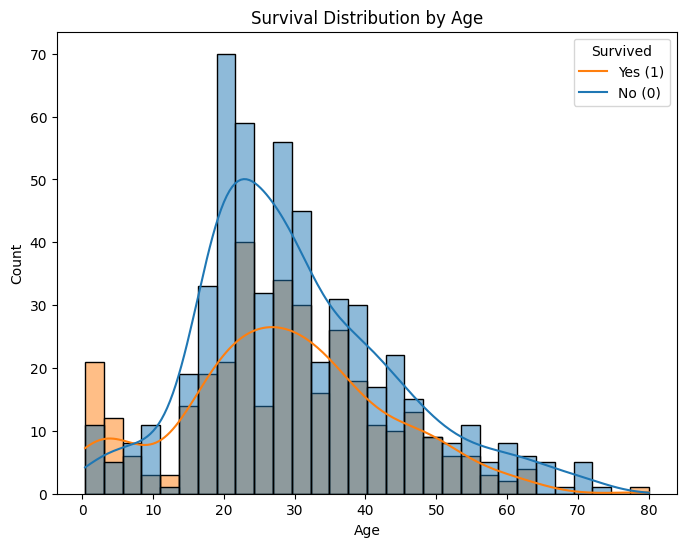

In [15]:
plt.figure(figsize = (8, 6))
sns.histplot(x = 'Age', hue='Survived', kde = True, bins = 30, common_norm=False, data = df)
plt.title('Survival Distribution by Age')
plt.legend(title='Survived', labels = ['Yes (1)', 'No (0)'])
plt.show()

In [18]:
mean_age = df['Age'].mean()

In [19]:
df['Age'] = df['Age'].fillna(mean_age)

In [20]:
print(f"Filled missing 'Age' values with mean: {mean_age:.2f}")


Filled missing 'Age' values with mean: 29.47


In [21]:
df['Sex'] = df['Sex'].map({'female': 1, 'male':0})

In [25]:
feature = ['Age','Sex', 'Pclass', 'Fare'] 
target = 'Survived'

In [26]:
final_df = df[feature + [target]].dropna()

In [27]:
final_df.head()

Age  Sex  Pclass     Fare  Survived
0  22.0    0       3   7.2500         0
1  38.0    1       1  71.2833         1
2  26.0    1       3   7.9250         1
3  35.0    1       1  53.1000         1
4  35.0    0       3   8.0500         0

In [28]:
X = final_df[feature]
y = final_df[target]

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [31]:
model = LogisticRegression()


In [32]:
model.fit(X_train, y_train)

LogisticRegression()

In [33]:
y_pred = model.predict(X_test)

In [35]:
accuracy = accuracy_score(y_pred, y_test)
accuracy

0.7640449438202247

In [36]:
confusion = confusion_matrix(y_pred, y_test)
confusion

array([[96, 27],
       [15, 40]], dtype=int64)

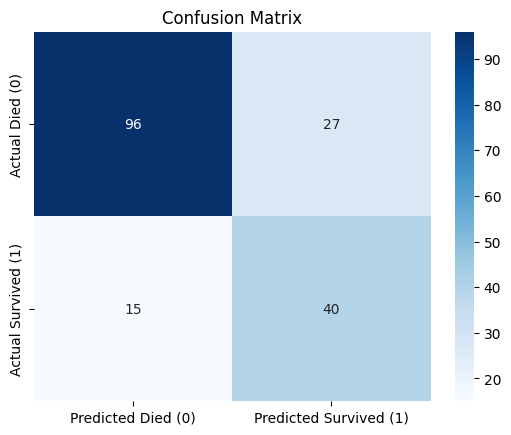

In [40]:
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Died (0)', 'Predicted Survived (1)'],
            yticklabels=['Actual Died (0)', 'Actual Survived (1)'])
plt.title('Confusion Matrix')
plt.show()

In [41]:
git init

SyntaxError: invalid syntax (2830201818.py, line 1)